In [1]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
import datetime
from scipy import stats
%matplotlib inline

In [2]:
members = pd.read_csv('members_v3.csv') 
transactions_1 = pd.read_csv('transactions.csv') 
transactions = transactions_1.append(pd.read_csv('transactions_v2.csv') )
user_logs = pd.read_csv('user_logs_v2.csv')
train = pd.read_csv('train_v2.csv')

## memory reduction 

In [3]:
members['registration_init_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[:4]))
members['registration_init_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_init_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[-2:]))

members['registration_init_year'] = members['registration_init_year'].astype(np.int16)
members['registration_init_month'] = members['registration_init_month'].astype(np.int8)
members['registration_init_date'] = members['registration_init_date'].astype(np.int8)

members['city'] = members['city'].astype(np.int8)
members['bd'] = members['bd'].astype(np.int16)
members['registered_via'] = members['registered_via'].astype(np.int8)
members['registration_init_year'] = members['registration_init_year'].astype(np.int16)
members['registration_init_month'] = members['registration_init_month'].astype(np.int8)
members['registration_init_date'] = members['registration_init_date'].astype(np.int8)

members = members.drop('registration_init_time', 1)

print(members.memory_usage().sum()/1023**2,"MB")

155.24412605861855 MB


In [1]:
members.head()

NameError: name 'members' is not defined

In [5]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22978755 entries, 0 to 1431008
Data columns (total 9 columns):
msno                      object
payment_method_id         int64
payment_plan_days         int64
plan_list_price           int64
actual_amount_paid        int64
is_auto_renew             int64
transaction_date          int64
membership_expire_date    int64
is_cancel                 int64
dtypes: int64(8), object(1)
memory usage: 1.7+ GB


In [6]:
transactions['transaction_date_year'] = transactions['transaction_date'].apply(lambda x: int(str(x)[:4]))
transactions['transaction_date_month'] = transactions['transaction_date'].apply(lambda x: int(str(x)[4:6]))
transactions['transaction_date_date'] = transactions['transaction_date'].apply(lambda x: int(str(x)[-2:]))

transactions['membership_expire_date_year'] = transactions['membership_expire_date'].apply(lambda x: int(str(x)[:4]))
transactions['membership_expire_date_month'] = transactions['membership_expire_date'].apply(lambda x: int(str(x)[4:6]))
transactions['membership_expire_date_date'] = transactions['membership_expire_date'].apply(lambda x: int(str(x)[-2:]))

transactions['transaction_date_year'] = transactions['transaction_date_year'].astype(np.int16)
transactions['transaction_date_month'] = transactions['transaction_date_month'].astype(np.int8)
transactions['transaction_date_date'] = transactions['transaction_date_date'].astype(np.int8)

transactions['membership_expire_date_year'] = transactions['membership_expire_date_year'].astype(np.int16)
transactions['membership_expire_date_month'] = transactions['membership_expire_date_month'].astype(np.int8)
transactions['membership_expire_date_date'] = transactions['membership_expire_date_date'].astype(np.int8)

transactions['payment_method_id'] = transactions['payment_method_id'].astype(np.int8)
transactions['payment_plan_days'] = transactions['payment_plan_days'].astype(np.int16)
transactions['plan_list_price'] = transactions['plan_list_price'].astype(np.int16)
transactions['actual_amount_paid'] = transactions['actual_amount_paid'].astype(np.int16)
transactions['is_auto_renew'] = transactions['is_auto_renew'].astype(np.int8)
transactions['is_cancel'] = transactions['is_cancel'].astype(np.int8)

transactions = transactions.drop('transaction_date', 1)
transactions = transactions.drop('membership_expire_date', 1)

print(transactions.memory_usage(index=True).sum()/ 1024**2," MB")

723.1701993942261  MB


In [7]:
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,transaction_date_year,transaction_date_month,transaction_date_date,membership_expire_date_year,membership_expire_date_month,membership_expire_date_date
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,0,2015,9,30,2015,11,1
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,0,2015,9,30,2015,10,31
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,0,2015,9,30,2016,4,27
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,0,2015,9,30,2015,11,28
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,0,2015,9,30,2015,11,21


In [8]:
pwd

'/home/ubuntu'

In [9]:
print(user_logs.info())
user_logs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396362 entries, 0 to 18396361
Data columns (total 9 columns):
msno          object
date          int64
num_25        int64
num_50        int64
num_75        int64
num_985       int64
num_100       int64
num_unq       int64
total_secs    float64
dtypes: float64(1), int64(7), object(1)
memory usage: 1.2+ GB
None


,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


In [10]:
user_logs['date_year'] = user_logs['date'].apply(lambda x: int(str(x)[:4]))
user_logs['date_month'] = user_logs['date'].apply(lambda x: int(str(x)[4:6]))
user_logs['date_date'] = user_logs['date'].apply(lambda x: int(str(x)[-2:]))

user_logs['date_year'] = user_logs['date_year'].astype(np.int16)
user_logs['date_month'] = user_logs['date_month'].astype(np.int8)
user_logs['date_date'] = user_logs['date_date'].astype(np.int8)

user_logs['num_25'] = user_logs['num_25'].astype(np.int16)
user_logs['num_50'] = user_logs['num_50'].astype(np.int16)
user_logs['num_75'] = user_logs['num_75'].astype(np.int16)
user_logs['num_985'] = user_logs['num_985'].astype(np.int16)
user_logs['num_100'] = user_logs['num_100'].astype(np.int32)
user_logs['num_unq'] = user_logs['num_unq'].astype(np.int16)

user_logs = user_logs.drop('date', 1)

print(user_logs.memory_usage().sum()/1023**2,"MB")

597.6675620073596 MB


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 2 columns):
msno        970960 non-null object
is_churn    970960 non-null int64
dtypes: int64(1), object(1)
memory usage: 14.8+ MB


In [12]:
train['is_churn'] = train['is_churn'].astype(np.int8)

print(train.memory_usage().sum()/1023**2,"MB")

8.350239697132139 MB


Churn Percentage: 8.994191315811156


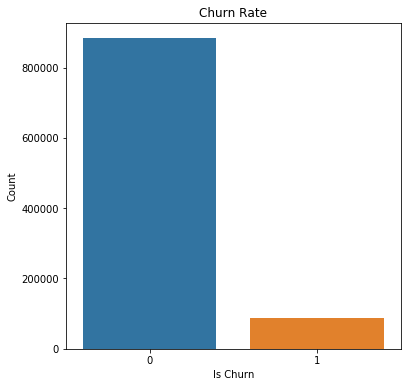

In [13]:
plt.figure(figsize = (6,6))
sns.countplot(x = "is_churn",data = train)
plt.title('Churn Rate')
plt.xlabel('Is Churn')
plt.ylabel('Count')
print('Churn Percentage: ' + str(87330/970960 * 100))

## this looks really imbalanced !!

In [14]:
x1 = pd.merge(train,members, on='msno', how='left')

In [15]:
x1.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_year,registration_init_month,registration_init_date
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,2013.0,12.0,23.0
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,2013.0,12.0,23.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013.0,12.0,27.0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014.0,1.0,9.0
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,female,7.0,2014.0,1.0,25.0


## which city has the most users ??? also does it allign with the churn rate?

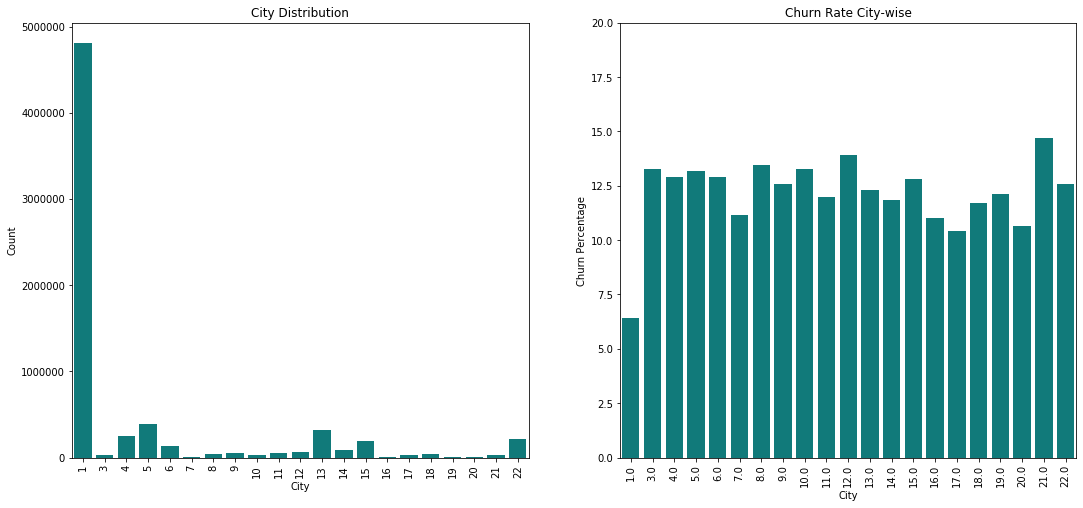

In [16]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.countplot(x="city", data=members, color = 'darkcyan')
plt.xlabel('City')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('City Distribution')

plt.subplot(122)
a = x1.groupby(['city','is_churn'])['msno'].count().reset_index()
a = pd.pivot_table(a, values='msno', index='city',columns='is_churn')
a['city_churn_percentage'] = (a[1]/(a[0] + a[1]))*100
a = a.reset_index()
sns.barplot(x = 'city', y = 'city_churn_percentage',data = a, color = 'darkcyan')
plt.ylim(0, 20)
plt.title('Churn Rate City-wise')
plt.xlabel('City')
plt.ylabel('Churn Percentage')
plt.xticks(rotation = 90)

plt.show()

#### city 1 has max of users ,whats more intresting here is to know that city with maximum customers   has the least churn rate 

### Age distribution 

4          32
5          30
7          34
8          19
9          63
           ..
6769455    52
6769462    32
6769464    23
6769467    26
6769470    26
Name: bd, Length: 2214692, dtype: int16

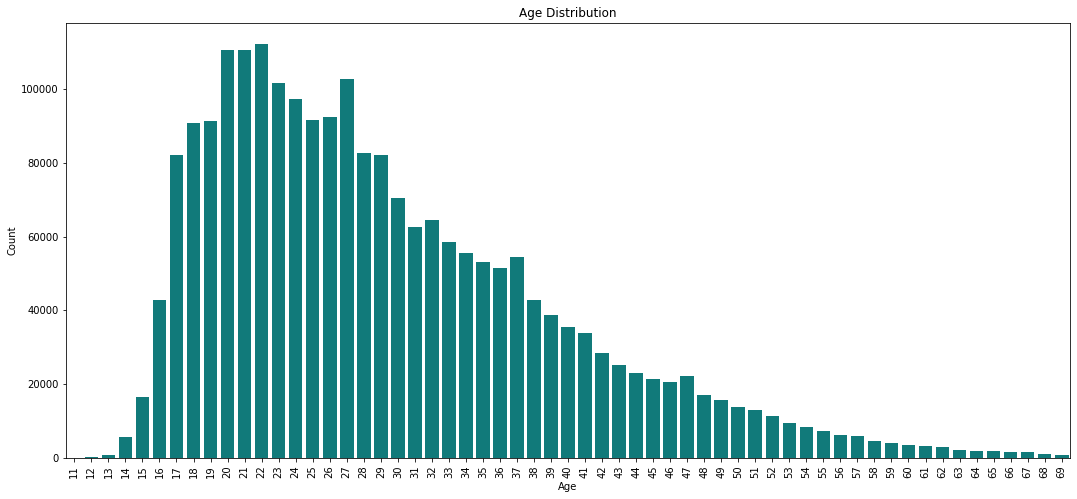

In [17]:
plt.figure(figsize = (18,8))

filtered_bd =members.bd[(members.bd > 10 )& (members.bd < 70)] 
sns.countplot(filtered_bd, color = 'darkcyan')
plt.xticks(rotation = 90)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

#plt.show()
filtered_bd

### in the above chart we can clearly see that the bulk of the users are from the ages of 16-40

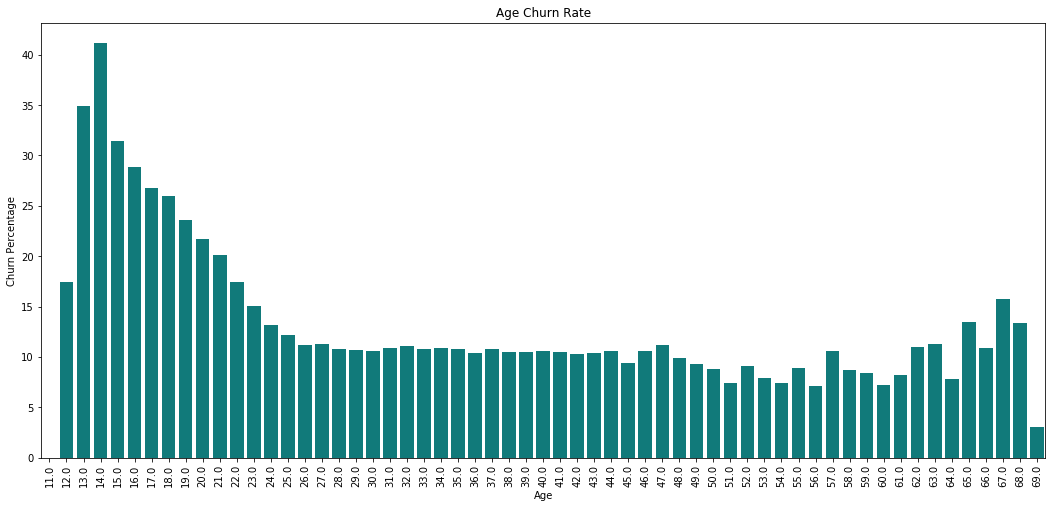

In [18]:
plt.figure(figsize = (18,8))
filtered_bd_x1 =x1[(x1.bd > 10 )& (x1.bd < 70)] 

b = filtered_bd_x1.groupby(['bd','is_churn'])['msno'].count().reset_index()
b = pd.pivot_table(b, values='msno', index='bd',columns=['is_churn'])
b['age_churn_percentage'] = (b[1]/(b[0] + b[1]))*100
b = b.reset_index()
sns.barplot(x = 'bd', y = 'age_churn_percentage',data = b, color = 'darkcyan')
plt.xticks(rotation = 90)
plt.xlabel('Age')
plt.ylabel('Churn Percentage')
plt.title('Age Churn Rate')
plt.savefig('Age Churn Rate.png')
plt.show()

####  here though the bulk of the data represents  the age group of 15-38  its is important to note that the churn is high at 13-16 years 

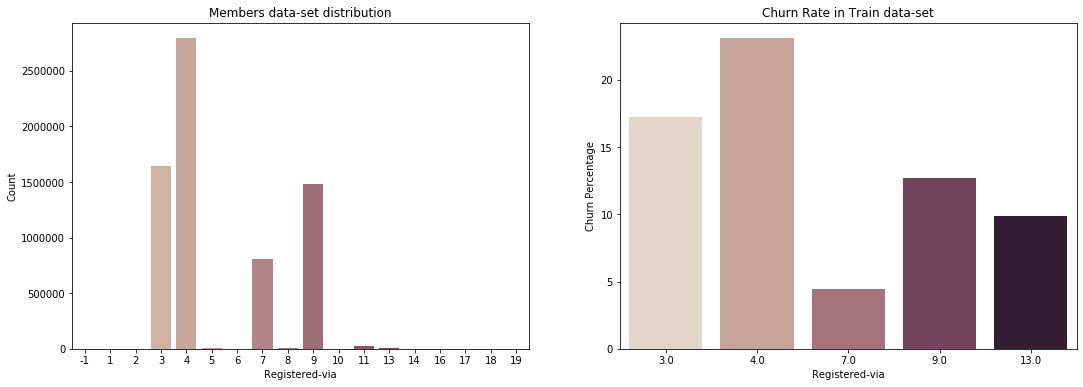

In [19]:
plt.figure(figsize=(18,6))
plt.subplot(121)
members['registered_via'] = members['registered_via'].fillna('Missing')
sns.countplot(x="registered_via", data=members, palette="ch:.25")
plt.title('Members data-set distribution')
plt.xlabel('Registered-via')
plt.ylabel('Count')

plt.subplot(122)
d = x1.groupby(['registered_via', 'is_churn'])['msno'].count().reset_index()
d = pd.pivot_table(d, index = 'registered_via', columns = 'is_churn', values = 'msno', aggfunc = np.sum)
d['registered_via_churn_percentage'] = (d[1]/(d[1] + d[0])) * 100
d = d.reset_index()
sns.barplot(x = 'registered_via', y = 'registered_via_churn_percentage', data = d, palette="ch:.25")
plt.title('Churn Rate in Train data-set')
plt.xlabel('Registered-via')
plt.ylabel('Churn Percentage')
plt.savefig('Registered-via.png')
plt.show()

### method 7 seems to be corelated with the most loyal users thats something to be looked into . and 4 has the highest churn rate of all 

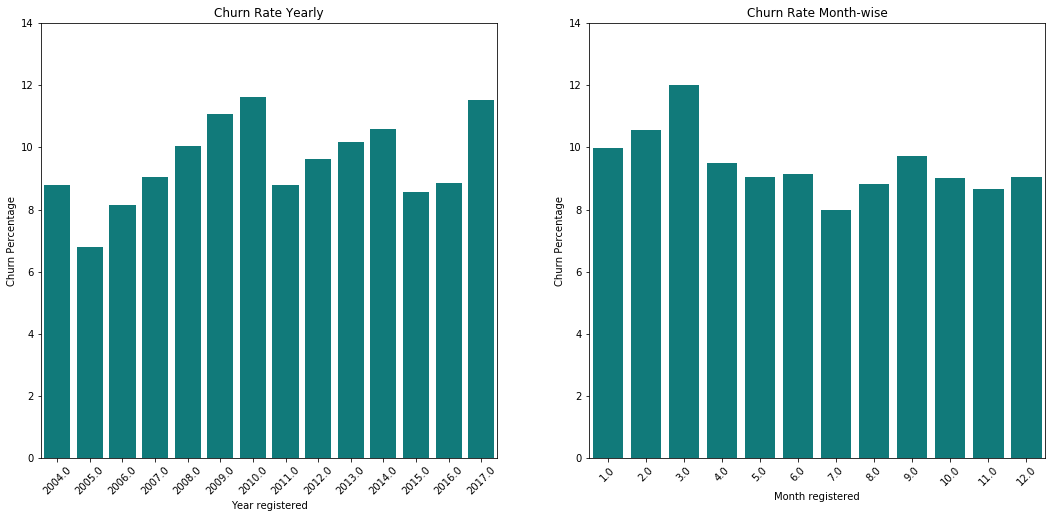

In [23]:
plt.figure(figsize=(18,8))

plt.subplot(121)
e = x1.groupby(['registration_init_year', 'is_churn'])['msno'].count().reset_index()
e = pd.pivot_table(e, index = 'registration_init_year', columns = 'is_churn', values = 'msno', aggfunc = np.sum)
e['churn_percentage_yearly'] = (e[1]/ (e[0] + e[1])) * 100
e = e.reset_index()
sns.barplot(x = 'registration_init_year', y = 'churn_percentage_yearly', data = e, color = 'darkcyan')
plt.ylim(0,14)
plt.xticks(rotation = 45)
plt.xlabel('Year registered')
plt.ylabel('Churn Percentage')
plt.title('Churn Rate Yearly')

plt.subplot(122)
f = x1.groupby(['registration_init_month', 'is_churn'])['msno'].count().reset_index()
f = pd.pivot_table(f, index = 'registration_init_month', columns = 'is_churn', values = 'msno', aggfunc = np.sum)
f['churn_percentage_monthly'] = (f[1]/ (f[0] + f[1])) * 100
f = f.reset_index()
sns.barplot(x = 'registration_init_month', y = 'churn_percentage_monthly', data = f, color = 'darkcyan')
plt.ylim(0,14)
plt.xticks(rotation = 45)
plt.xlabel('Month registered')
plt.ylabel('Churn Percentage')
plt.title('Churn Rate Month-wise')
plt.savefig('Churning trends yearly and monthly.png')
plt.show()

### no pattern between the years also march has maximumn churn 

In [24]:
x2 = pd.merge(train, transactions, on = 'msno', how = 'left')

In [25]:
x2.head()

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,transaction_date_year,transaction_date_month,transaction_date_date,membership_expire_date_year,membership_expire_date_month,membership_expire_date_date
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,38,30,149,149,0,0,2017,2,28,2017,3,30
1,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,31,0,0,149,1,0,2015,3,31,2015,4,30
2,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,31,0,0,149,1,0,2015,6,30,2015,7,31
3,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,31,30,149,149,1,1,2015,9,2,2015,9,1
4,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,31,0,0,149,1,0,2015,8,31,2015,9,30


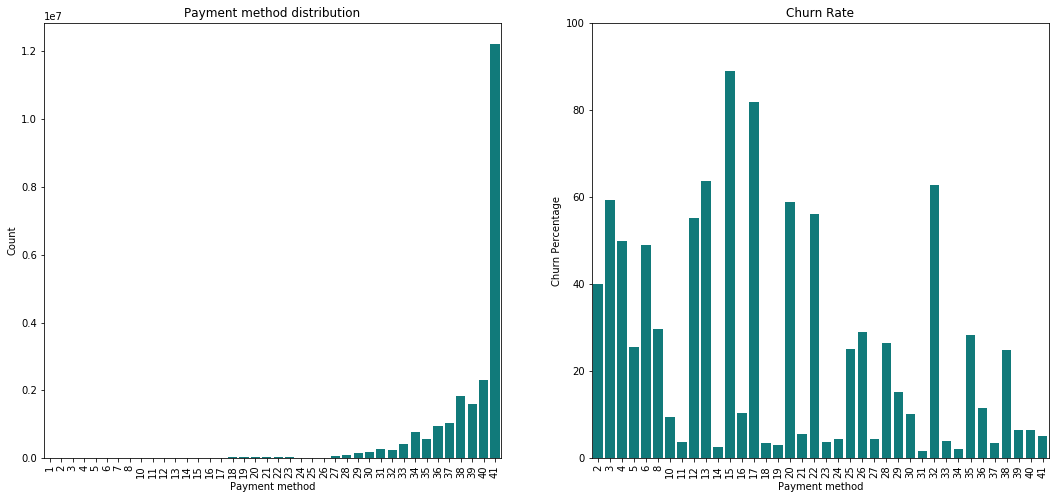

In [26]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.countplot(x="payment_method_id", data=transactions, color = 'darkcyan')
plt.xticks(rotation = 90)
plt.xlabel('Payment method')
plt.ylabel('Count')
plt.title('Payment method distribution')

plt.subplot(122)
df1 = x2.groupby(['payment_method_id', 'is_churn'])['msno'].count().reset_index()
df1 = pd.pivot_table(df1, index = 'payment_method_id', columns = 'is_churn', values = 'msno', aggfunc = np.sum)
df1['churn_percentage'] = (df1[1]/ (df1[0] + df1[1])) * 100
df1 = df1.reset_index()
sns.barplot(x = 'payment_method_id', y = 'churn_percentage', data = df1, color = 'darkcyan')
plt.xticks(rotation = 90)
plt.title('Churn Rate')
plt.xlabel('Payment method')
plt.ylabel('Churn Percentage')
plt.ylim(0,100)
plt.savefig('Payment method.png')
plt.show()

#### highest payment mthd is clearly 41 and is also asssociated with users of minimum churn (most loyal),this payment method can be somnething that can be looked into 

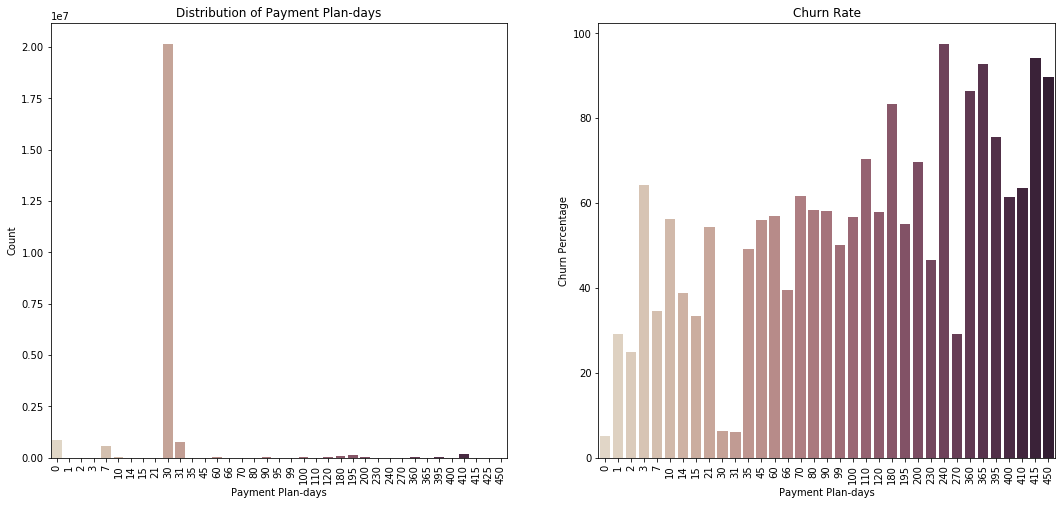

In [27]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.countplot(x="payment_plan_days", data=transactions,  palette="ch:.27")
plt.xlabel('Payment Plan-days')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Distribution of Payment Plan-days')

plt.subplot(122)
df2 = x2.groupby(['payment_plan_days', 'is_churn'])['msno'].count().reset_index()
df2 = pd.pivot_table(df2, index = 'payment_plan_days', columns = 'is_churn', values = 'msno', aggfunc = np.sum)
df2['churn_percentage'] = (df2[1]/ (df2[0] + df2[1])) * 100
df2 = df2.reset_index()
sns.barplot(x = 'payment_plan_days', y = 'churn_percentage', data = df2,  palette="ch:.25")
plt.xlabel('Payment Plan-days')
plt.xticks(rotation = 90)
plt.ylabel('Churn Percentage')
plt.title('Churn Rate')
plt.savefig('Payment Plan-days.png')
plt.show()

 no nulls in transction 
#### this is particularly surprising because the lowest churn payment plans (30 day,31day,0 day) actually are the most used plan and the plans with maximum churn are not even used at all so my suggestion would be to get rid of these neccessary features  

In [34]:
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,transaction_date_year,transaction_date_month,transaction_date_date,membership_expire_date_year,membership_expire_date_month,membership_expire_date_date
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,0,2015,9,30,2015,11,1
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,0,2015,9,30,2015,10,31
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,0,2015,9,30,2016,4,27
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,0,2015,9,30,2015,11,28
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,0,2015,9,30,2015,11,21


In [35]:
diff_price = transactions['plan_list_price'] - transactions['actual_amount_paid'] 
diff_price = diff_price[diff_price !=0]


In [39]:
pos_price = diff_price[diff_price > 0]
neg_price = diff_price[diff_price < 0]


In [50]:
pos_price.count()

867020

<BarContainer object of 7 artists>

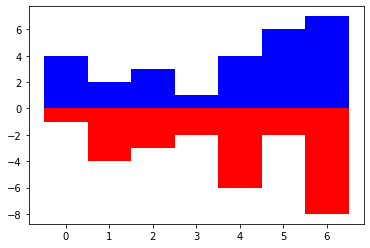

In [45]:
x = range(7)
negative_data = [-1,-4,-3,-2,-6,-2,-8]
positive_data = [4,2,3,1,4,6,7,]

fig = plt.figure()
ax = plt.subplot(111)
ax.bar(x, negative_data, width=1, color='r')
ax.bar(x, positive_data, width=1, color='b')

In [41]:
x = range(len(diff_price))